# Insurance Fraud Dection using Random Forest and Artificial Neural Network

1. Show data cleaning and preparation steps

2. Perform EDA on the given dataset and list out findings

3. Predict the fraud projection with random tree algorithms - Use accuracy as metrics and provide best possible accuracy.

4. Predict the fraud projection with artificial neural network - Use accuracy as metrics and provide best possible accuracy.

5. Overall random forest achieved better accuracy

![](https://cdn-images-1.medium.com/max/2000/1*iIx75bixLRbE45mXkH2oCg.png/)

## Import needed dependencies :

In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


## Load the preprocessed dataset:

Download the preprocessed dataset [Download](https://drive.google.com/file/d/1rzbDYv3tYLQ7J-P3cgG7mHVwxWzgBwdr/view?usp=sharing)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def one_hot_cat_column(feature_name, vocab):
  return fc.indicator_column(
      fc.categorical_column_with_vocabulary_list(feature_name,
                                                 vocab))

In [0]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def One_hot_cat_column(df_data, feature_names):
    df_results = pd.DataFrame()
    for i in range(len(feature_names)):
        #labelencoder_X = LabelEncoder()
        #enc = labelencoder_X.fit_transform(df_data.loc[:,feature_names[i]])
        enc = OneHotEncoder(handle_unknown='ignore')
        enc_df = pd.DataFrame(enc.fit_transform(df_data.loc[:,[feature_names[i]]]).toarray())
        df_results = pd.concat([enc_df, df_results], axis = 1)
         #labelencoder_X = LabelEncoder()
        

        #enc = OneHotEncoder(handle_unknown='ignore')
       

    return df_results
        
        
    

In [0]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset/Week9/insurance_claims.csv")

In [0]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [0]:
feature_example = ['insured_education_level', 'insured_occupation']
df_example_onehotcoding =  One_hot_cat_column(data, feature_names=feature_example)

In [0]:
df_example_onehotcoding.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,0,1,2,3,4,5,6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
def dataclean(datafile):
    data = pd.read_csv(datafile)
    data_Fraud = data[data['fraud_reported']=='Y']
    data_NonFraud =  data[data['fraud_reported']=='N']    
    data['fraud_reported'].value_counts()
    df_fraud_example = pd.concat([data_Fraud, data_Fraud, data_Fraud], axis = 0)
    data_balanced = pd.concat([data_NonFraud, df_fraud_example], axis = 0)
    data_balanced = data_balanced.sample(frac=1).reset_index(drop=True)
    data_balanced['fraud_reported'] = np.where(data_balanced['fraud_reported']=='Y', 1, 0)
    data_balanced['insured_sex'] = np.where(data_balanced['insured_sex']=='MALE', 1, 0)

    data_balanced['incident_date'] = pd.to_datetime(data_balanced['incident_date'])
    data_balanced['policy_bind_date'] = pd.to_datetime(data_balanced['policy_bind_date'])

    data_balanced['accd_month_since'] = round(pd.to_numeric((data_balanced['incident_date']  - data_balanced['policy_bind_date']) / np.timedelta64(1, 'M')))
    data_balanced.drop(columns = ['policy_number', 'policy_bind_date', 'incident_date', 'incident_location', 'insured_zip', '_c39'], axis = 1, inplace=True)
    num_columns = ['months_as_customer', 'age','accd_month_since', 'capital-gains','capital-loss', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim','auto_year']
    cat_columns = [ 'policy_state', 'policy_csl','insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship','insured_sex',
                       'incident_type', 'collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 
                       'police_report_available', 'auto_make']
    selectedcolumns = num_columns + cat_columns
    
    df_cat = One_hot_cat_column(data_balanced, cat_columns)

    data_encoding = pd.concat([data_balanced[num_columns], df_cat], axis = 1)

    #dftrain =data_encoding.iloc[:1200, :]
    #dfeval = data_encoding.iloc[1200:,:]
    df_train = data_encoding
    y_train = data_balanced.loc[:, ['fraud_reported']].values
    #y_eval = data_balanced.loc[1200:, ['fraud_reported']].values
    #dftrain = dftrain[selectedcolumns]
    #dfeval = dfeval[selectedcolumns]

    return df_train, y_train 



In [0]:
import os

os.getcwd()

'/content'

In [0]:
datafile = "/content/drive/My Drive/Colab Notebooks/Dataset/Week9/insurance_claims.csv"

In [0]:
df_train, y_train = dataclean(datafile)

In [0]:
df_train.head()

,months_as_customer,age,accd_month_since,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,0,1,2,3,4,5,6,7,8,9,10,11,12,13,0,1,2,0,1,2,0,1,2,3,4,5,6,0,1,2,...,7,8,9,10,11,12,13,14,15,16,17,18,19,0,1,2,3,4,5,6,7,8,9,10,11,12,13,0,1,2,3,4,5,6,0,1,2,0,1,2
0,160,33,71.0,61600,0,52800,5280,5280,42240,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,281,43,259.0,0,0,60190,9260,9260,41670,1999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,156,31,221.0,0,0,59000,5900,5900,47200,2013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,19,29,148.0,0,0,75400,11600,11600,52200,2005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,222,41,195.0,37800,-50300,61290,6810,6810,47670,1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [0]:
y = y_train #dataset['Survived']
X = df_train #dataset.drop(['Survived'], axis = 1)

# Split the dataset to trainand test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

## Set the parameters for the random forest model :

In [0]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 10, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

## Hyperparameters of Sklearn Random forest classifier[[2]](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) :

*	**bootstrap** : boolean, optional (default=True)

> Whether bootstrap samples are used when building trees.

*	**min_samples_leaf** : int, float, optional (default=1)

> The minimum number of samples required to be at a leaf node:

> - If int, then consider min_samples_leaf as the minimum number.

> - If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

* **n_estimators** : integer, optional (default=10)
> The number of trees in the forest.

* 	**min_samples_split** :  int, float, optional (default=2)
> The minimum number of samples required to split an internal node:

> - If int, then consider min_samples_split as the minimum number.
> -	If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

*	**max_features** : int, float, string or None, optional (default=”auto”)
> The number of features to consider when looking for the best split:

> -	If int, then consider max_features features at each split.
> -If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
> -	If “auto”, then max_features=sqrt(n_features).
> -	If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
> -	If “log2”, then max_features=log2(n_features).
> -	If None, then max_features=n_features.


*	**max_depth** :  integer or None, optional (default=None)
> The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


*	**max_leaf_nodes** : int or None, optional (default=None)
> Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.


If you want to learn more about the rest of hyperparameters , check out  [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

## Define the model :

In [0]:
RF_model = RandomForestClassifier(**parameters)

## Train the model :

In [0]:
RF_model.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Test the trained model on test data :

In [0]:
RF_predictions = RF_model.predict(test_X)

In [0]:
score = accuracy_score(test_y ,RF_predictions)
print(score)

0.8288770053475936


In [0]:
scores_all = []
treeNums =[]
for i in range(10):
    parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': (i+1)*20, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

    RF_model = RandomForestClassifier(**parameters)
    RF_model.fit(train_X, train_y)
    RF_predictions = RF_model.predict(test_X)
    score = accuracy_score(test_y ,RF_predictions)
    treeNums.append((i+1)*20)
    scores_all.append(score)
    print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.8315508021390374
0.8689839572192514
0.8743315508021391
0.8716577540106952


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.8716577540106952


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.8636363636363636


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.8716577540106952


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.8663101604278075


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.8716577540106952


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.8689839572192514


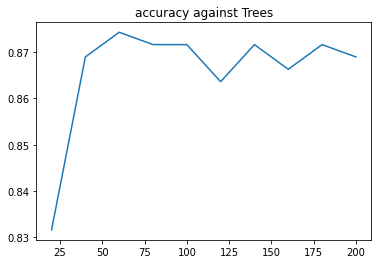

In [0]:
import matplotlib.pyplot as plt
plt.title("accuracy against Trees")
plt.plot(treeNums, scores_all)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8262032085561497
0.820855614973262


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8449197860962567
0.8475935828877005


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8716577540106952


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8663101604278075


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8743315508021391


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8796791443850267


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8850267379679144


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8903743315508021


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.893048128342246


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8983957219251337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8957219251336899


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8983957219251337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9064171122994652


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.893048128342246


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9037433155080213


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8983957219251337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9117647058823529


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9037433155080213


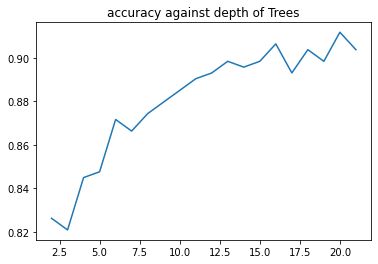

In [0]:
scores_all = []
max_depth_all =[]
scores_train =[]
for i in range(20):
    parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 100, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': i + 2,
              'max_leaf_nodes': None}

    RF_model = RandomForestClassifier(**parameters)
    RF_model.fit(train_X, train_y)
    RF_predictions_train = RF_model.predict(train_X)
    scores_train.append(accuracy_score(train_y ,RF_predictions_train))
    RF_predictions = RF_model.predict(test_X)
    score = accuracy_score(test_y ,RF_predictions)
    max_depth_all.append((i+2))
    scores_all.append(score)
    print(score)

plt.title("accuracy against depth of Trees")
plt.plot(max_depth_all, scores_all)

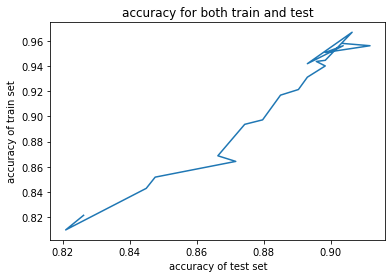

In [0]:
plt.title("accuracy for both train and test")
plt.xlabel("accuracy of test set")
plt.ylabel("accuracy of train set")
plt.plot(scores_all,scores_train)


![](https://)We see that the model's accuracy is  86%, not bad at all.

#Using Neural Networks:


## Define the model :

In [0]:
# Build a neural network :
NN_model = Sequential()

NN_model.add(Dense(512, input_dim = 116, activation='tanh'))
NN_model.add(Dense(512, activation='tanh'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Define a checkpoint callback :

In [0]:
#checkpoint_name = 'Weights-{epoch:03d}-{val_acc:.5f}.hdf5' 
#checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_accuracy', verbose = 1, save_best_only = True, mode ='max')
#callbacks_list = [checkpoint]

## Train the model :

In [0]:
history = NN_model.fit(train_X, train_y, epochs=1000, batch_size=64, validation_data= (test_X, test_y) )# validation_split = 0.2)

Train on 1120 samples, validate on 374 samples
Epoch 1/1000
1120/1120 [==============================] - 1s 452us/step - loss: 0.6960 - accuracy: 0.5429 - val_loss: 0.6917 - val_accuracy: 0.4920
Epoch 2/1000
1120/1120 [==============================] - 0s 236us/step - loss: 0.6780 - accuracy: 0.5518 - val_loss: 0.6863 - val_accuracy: 0.5481
Epoch 3/1000
1120/1120 [==============================] - 0s 256us/step - loss: 0.6777 - accuracy: 0.5339 - val_loss: 0.6914 - val_accuracy: 0.5027
Epoch 4/1000
1120/1120 [==============================] - 0s 237us/step - loss: 0.6739 - accuracy: 0.5670 - val_loss: 0.6853 - val_accuracy: 0.5829
Epoch 5/1000
1120/1120 [==============================] - 0s 250us/step - loss: 0.6734 - accuracy: 0.5536 - val_loss: 0.6860 - val_accuracy: 0.5695
Epoch 6/1000
1120/1120 [==============================] - 0s 245us/step - loss: 0.6815 - accuracy: 0.5402 - val_loss: 0.6822 - val_accuracy: 0.5882
Epoch 7/1000
1120/1120 [==============================] - 0s 254u

In [0]:
# Load wights file of the best model :
wights_file = './Weights-016-0.88060.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

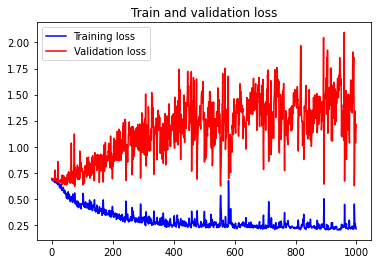

In [0]:
plot_train_history(history, "Train and validation loss")

In [0]:
history.history

In [0]:
def plot_train_history_accuray(history, title):
  accuray = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  
  epochs = range(len(accuracy))

  plt.figure()

  plt.plot(epochs, accuracy, 'b', label='Training accuray')
  plt.plot(epochs, val_accuracy, 'r', label='Validation accuray')
  plt.title(title)
  plt.legend()

  plt.show()

In [0]:
plot_train_history_accuray(history, "Accuray for ANN")

## Test the trained model on test data :

In [0]:
predictions = NN_model.predict(test_X)

In [0]:
# round predictions
rounded = [round(x[0]) for x in predictions]
predictions = rounded

In [0]:
score = accuracy_score(test_y ,predictions)
print(score)

0.732620320855615


In [0]:
train_X.head()


,months_as_customer,age,accd_month_since,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,0,1,2,3,4,5,6,7,8,9,10,11,12,13,0,1,2,0,1,2,0,1,2,3,4,5,6,0,1,2,...,7,8,9,10,11,12,13,14,15,16,17,18,19,0,1,2,3,4,5,6,7,8,9,10,11,12,13,0,1,2,3,4,5,6,0,1,2,0,1,2
312,272,43,234.0,0,0,81070,7370,14740,58960,2006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8,228,44,8.0,66000,-46000,6500,1300,650,4550,2009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
464,97,28,59.0,0,-32600,45270,10060,10060,25150,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1366,108,29,87.0,71400,0,61380,11160,5580,44640,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
479,4,34,141.0,0,0,66880,6080,12160,48640,1996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


The accuracy of this neural network model is 73%, we notice that using random forest gives us a higher accuracy.